IMPORTING VARIOUS DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

# DATA LOADING AND PREPROCESSING

In [2]:
#load diabetes readmission data to panda dataframe
dd = pd.read_csv("./diabetic_data.csv", na_values ='?')

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
#Print first 5 columns
dd.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Print data shape
dd.shape

(101766, 50)

In [5]:
#Get Data Information
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
#list of all columns
dd.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
#Statistical description of each columns
dd.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
#Check missing values in the categorical columns
dd.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
#calculating the number of missing values (unknown/invalid) in 'gender' 
print('gender', dd['gender'][dd['gender'] == 'Unknown/Invalid'].count())

gender 3


handling missing values

In [10]:
#drop columns with missing values greater than 45%
dd = dd.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [11]:
#drop columns with one value occuring in more than 90%
dd = dd.drop(['repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis =1)

In [12]:
#info of new dataset
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [13]:
#remove missing instances in race and gender
dd = dd.dropna( how='any', subset=['race'])
dd.drop(dd[dd['gender'] == "Unknown/Invalid"].index, inplace = True)

In [14]:
#drop diag_1, diag_2, diag_3
dd = dd.drop(['diag_1','diag_2','diag_3'], axis = 1)

In [15]:
#checkifanymissingvalueisleft
print (dd.isnull().values.any())

False


In [16]:
#check if missing value left in gender
print('gender', dd['gender'][dd['gender'] == 'Unknown/Invalid'].count())  

gender 0


In [17]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99492 non-null  int64 
 1   patient_nbr               99492 non-null  int64 
 2   race                      99492 non-null  object
 3   gender                    99492 non-null  object
 4   age                       99492 non-null  object
 5   admission_type_id         99492 non-null  int64 
 6   discharge_disposition_id  99492 non-null  int64 
 7   admission_source_id       99492 non-null  int64 
 8   time_in_hospital          99492 non-null  int64 
 9   num_lab_procedures        99492 non-null  int64 
 10  num_procedures            99492 non-null  int64 
 11  num_medications           99492 non-null  int64 
 12  number_outpatient         99492 non-null  int64 
 13  number_emergency          99492 non-null  int64 
 14  number_inpatient     

In [18]:
#encode some features to binary
dd['A1Cresult'] = dd['A1Cresult'].replace('>7', 1)
dd['A1Cresult'] = dd['A1Cresult'].replace('>8', 1)
dd['A1Cresult'] = dd['A1Cresult'].replace('Norm', 0)
dd['A1Cresult'] = dd['A1Cresult'].replace('None', -99)
dd['max_glu_serum'] = dd['max_glu_serum'].replace('>200', 1)
dd['max_glu_serum'] = dd['max_glu_serum'].replace('>300', 1)
dd['max_glu_serum'] = dd['max_glu_serum'].replace('Norm', 0)
dd['max_glu_serum'] = dd['max_glu_serum'].replace('None', -99)

In [19]:
#binary conversion cont
dd['change'] = dd['change'].replace('Ch', 1)
dd['change'] = dd['change'].replace('No', 0)
dd['gender'] = dd['gender'].replace('Male', 1)
dd['gender'] = dd['gender'].replace('Female', 0)
dd['diabetesMed'] = dd['diabetesMed'].replace('Yes', 1)
dd['diabetesMed'] = dd['diabetesMed'].replace('No', 0)

# keys is the same as before
for col in dd.columns:
    dd[col] = dd[col].replace('No', 0)
    dd[col] = dd[col].replace('Steady', 1)
    dd[col] = dd[col].replace('Up', 1)
    dd[col] = dd[col].replace('Down', 1)

In [20]:
#Encode the race column
encoder = LabelEncoder()
dd["race"] = encoder.fit_transform(dd["race"])

In [21]:
#Reduce the ages to midpoint value

dd['age'] = dd['age'].replace("[0-10)",5)
dd['age'] = dd['age'].replace("[10-20)",15)
dd['age'] = dd['age'].replace("[20-30)",25)
dd['age'] = dd['age'].replace("[30-40)",35)
dd['age'] = dd['age'].replace("[40-50)",45)
dd['age'] = dd['age'].replace("[50-60)",55)
dd['age'] = dd['age'].replace("[60-70)",65)
dd['age'] = dd['age'].replace("[70-80)",75)
dd['age'] = dd['age'].replace("[80-90)",85)
dd['age'] = dd['age'].replace("[90-100)",95)

                            

In [22]:
#remove duplicates using the 'patient_nbr'
df = dd.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df.shape
(70442, 55)

(70442, 55)

In [23]:
df['readmitted'].value_counts()

NO     41666
>30    21834
<30     6167
Name: readmitted, dtype: int64

In [24]:
#reduce the readmitted target value to binary 
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
#remove the encounter_id and patient_nbr as they are not useful to the model
df = df.drop(['encounter_id','patient_nbr'], axis = 1)

In [26]:
df.head().T

,0,1,2,3,4
race,2,2,0,2,2
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [27]:
#check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69667 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      69667 non-null  int64
 1   gender                    69667 non-null  int64
 2   age                       69667 non-null  int64
 3   admission_type_id         69667 non-null  int64
 4   discharge_disposition_id  69667 non-null  int64
 5   admission_source_id       69667 non-null  int64
 6   time_in_hospital          69667 non-null  int64
 7   num_lab_procedures        69667 non-null  int64
 8   num_procedures            69667 non-null  int64
 9   num_medications           69667 non-null  int64
 10  number_outpatient         69667 non-null  int64
 11  number_emergency          69667 non-null  int64
 12  number_inpatient          69667 non-null  int64
 13  number_diagnoses          69667 non-null  int64
 14  max_glu_serum             69667 non-n

In [28]:
#convert originally categorical columns to categorical
i = ['A1Cresult', 'metformin','change','insulin', 'max_glu_serum',"diabetesMed",'admission_source_id','gender','age','discharge_disposition_id', 'admission_type_id',"race"]

df[i] = df[i].astype('object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69667 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69667 non-null  object
 1   gender                    69667 non-null  object
 2   age                       69667 non-null  object
 3   admission_type_id         69667 non-null  object
 4   discharge_disposition_id  69667 non-null  object
 5   admission_source_id       69667 non-null  object
 6   time_in_hospital          69667 non-null  int64 
 7   num_lab_procedures        69667 non-null  int64 
 8   num_procedures            69667 non-null  int64 
 9   num_medications           69667 non-null  int64 
 10  number_outpatient         69667 non-null  int64 
 11  number_emergency          69667 non-null  int64 
 12  number_inpatient          69667 non-null  int64 
 13  number_diagnoses          69667 non-null  int64 
 14  max_glu_serum        

In [30]:
df.head().T

,0,1,2,3,4
race,2,2,0,2,2
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


Data Visualization

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Readmission Distribution')

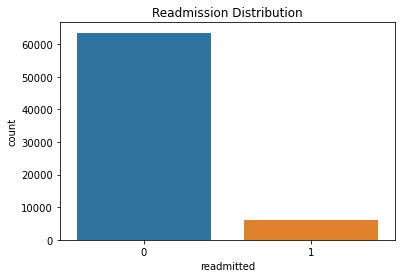

In [31]:
# Readmission Distribution
sns.countplot(df['readmitted']).set_title("Readmission Distribution")

<AxesSubplot:xlabel='count', ylabel='race'>

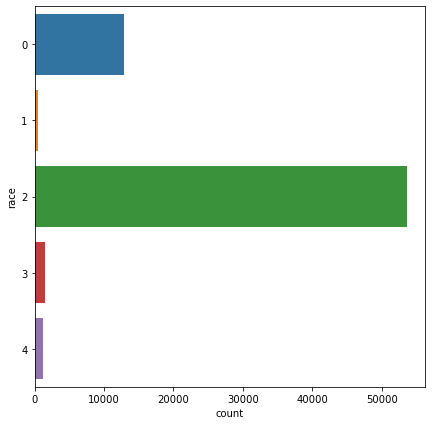

In [32]:
#visualize distribution of Race against readmission0: African/American 1: Asian 2: Caucasian 3: Hispanic 4:Others
fig = plt.figure(figsize=(7,7))
sns.countplot(y=df['race'])

<AxesSubplot:xlabel='count', ylabel='race'>

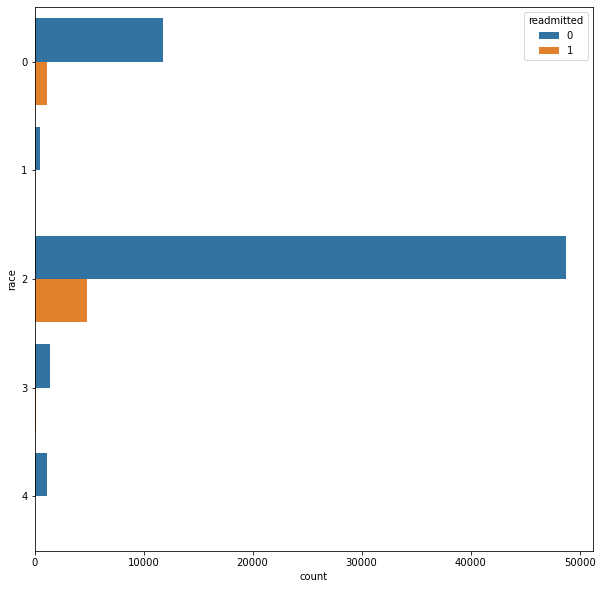

In [33]:
#Race against readmission
#0: African/American 1: Asian 2: Caucasian 3: Hispanic 4:Others
fig = plt.figure(figsize=(10,10))
sns.countplot(y = df['race'], hue = df['readmitted'])



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

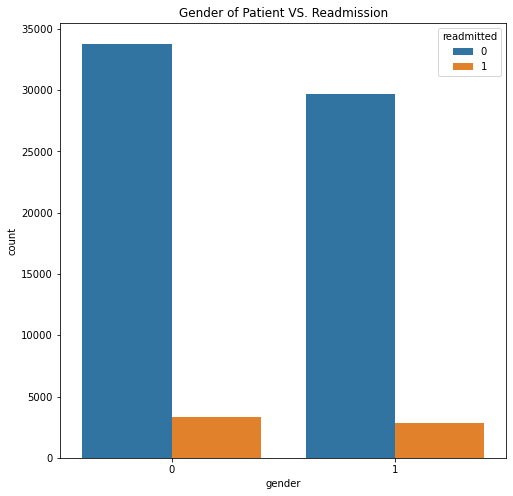

In [34]:
#gender against readmission, 0:male, 1:female
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Number of Diabetes Medication VS Readmission')

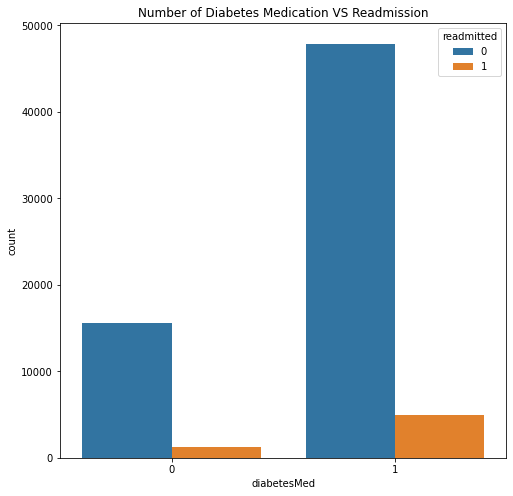

In [35]:
#diabetesMedication number against readmission, 0:no, 1:yes
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Number of Diabetes Medication VS Readmission')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Age VS. Readmission')

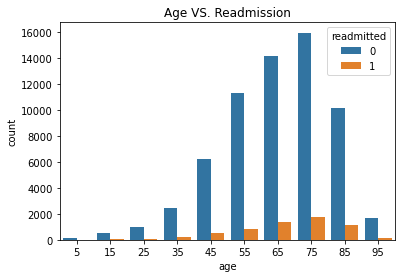

In [36]:
#age against readmission
sns.countplot(df['age'], hue = df['readmitted']).set_title("Age VS. Readmission")

# MODEL BUILDING

In [37]:
#Split dataset into testing and training data
target = "readmitted"
y = df[target]
X = df.drop(columns = target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=15)

In [38]:
#Using the SMOTE technique To handle unbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=15)
train_input, train_output = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output)))

Original dataset shape Counter({0: 50839, 1: 4894})
New dataset shape Counter({0: 50839, 1: 50839})


In [39]:
#split dataset into training and testing data
train_input = pd.DataFrame(train_input, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.20, random_state=0)


In [40]:
print(train_input.dtypes)

race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
insulin                     object
change                      object
diabetesMed                 object
dtype: object


Decision Tree

In [41]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=28, min_samples_split=10,random_state = 10)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)


The Accuracy is  0.9147816679779701
The Classification report on the decision tree model is               precision    recall  f1-score   support

           0       0.90      0.93      0.92     10149
           1       0.93      0.90      0.91     10187

    accuracy                           0.91     20336
   macro avg       0.92      0.91      0.91     20336
weighted avg       0.92      0.91      0.91     20336

The ROC _AUC score for decision classifier model is:  0.9371655500800901


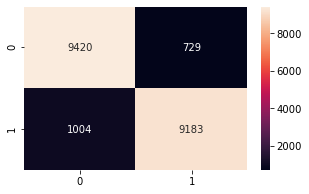

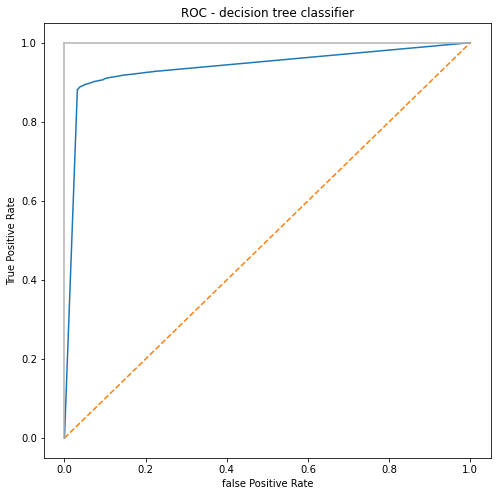

In [42]:
#Evaluation for decisionTreeClassifier
print("The Accuracy is ", accuracy_score(y_test, dtc_pred))
print("The Classification report on the decision tree model is" , classification_report(y_test, dtc_pred))
cm =confusion_matrix(y_test,dtc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')


#plot ROC curve
y_score = dtc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for decision classifier model is: ", roc_auc_score(y_test, y_score))
fpr,tpr, threshold= roc_curve(y_test, y_score)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - decision tree classifier')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

RandomForestClassifier

In [43]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=25, min_samples_split=10, random_state = 10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

The Accuracy is  0.9399095200629426
The Classification report on the random forest model is               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10149
           1       0.99      0.89      0.94     10187

    accuracy                           0.94     20336
   macro avg       0.95      0.94      0.94     20336
weighted avg       0.95      0.94      0.94     20336

The ROC _AUC score for random forest classifier model is:  0.9648944915323376


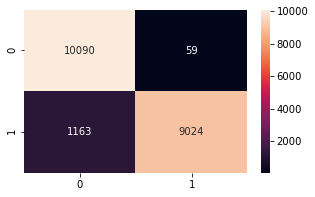

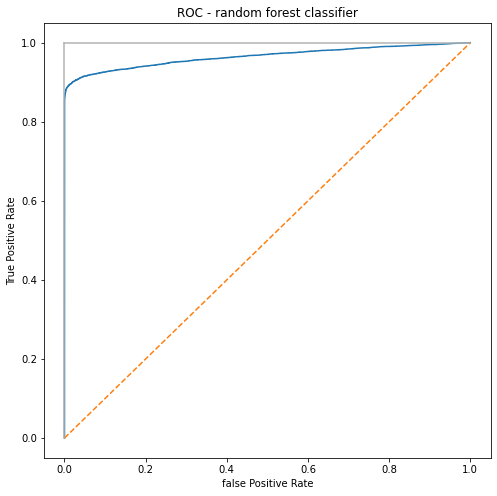

In [44]:
#evaluate accuracy
print("The Accuracy is ", accuracy_score(y_test, rfc_pred))
print("The Classification report on the random forest model is" , classification_report(y_test, rfc_pred))
cm =confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

#plot ROC curve
y_score = rfc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for random forest classifier model is: ", roc_auc_score(y_test, y_score))
fpr,tpr, threshold= roc_curve(y_test, y_score)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - random forest classifier')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

Gradient Boosting Classifier

In [45]:
#GradientBoostingClassifiers
gbc= GradientBoostingClassifier(n_estimators = 10, max_depth = 25, random_state = 10)
gbc.fit(X_train,y_train)
gbc_prd = gbc.predict(X_test)

The Accuracy is  0.9100118017309206
The Classification report on the GRADIENT BOOSTING tree model is               precision    recall  f1-score   support

           0       0.91      0.91      0.91     10149
           1       0.91      0.91      0.91     10187

    accuracy                           0.91     20336
   macro avg       0.91      0.91      0.91     20336
weighted avg       0.91      0.91      0.91     20336

The ROC _AUC score for gradientboostingclassifier is:  0.9348775542444476


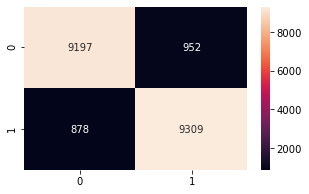

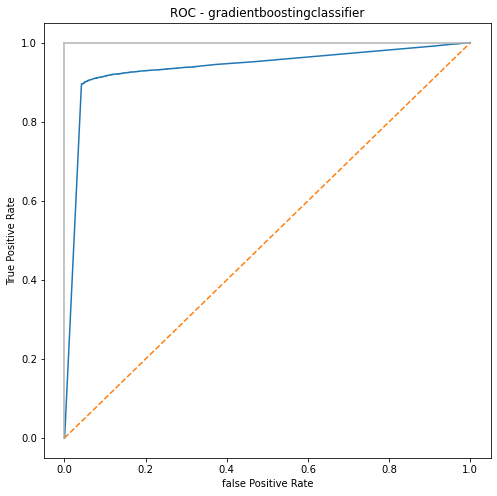

In [46]:
#Evaluation for gradientboostingclassifier
print("The Accuracy is ", accuracy_score(y_test, gbc_prd))
print("The Classification report on the GRADIENT BOOSTING tree model is" , classification_report(y_test, gbc_prd))
cm =confusion_matrix(y_test,gbc_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

#plot ROC curve
y_score = gbc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for gradientboostingclassifier is: ", roc_auc_score(y_test, y_score))
fpr,tpr, threshold= roc_curve(y_test, y_score)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - gradientboostingclassifier')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

GINI IMPORTANCE FOR RANDOM FOREST, DECISION TREE AND GRADIENT BOOSTING CLASSIFIER

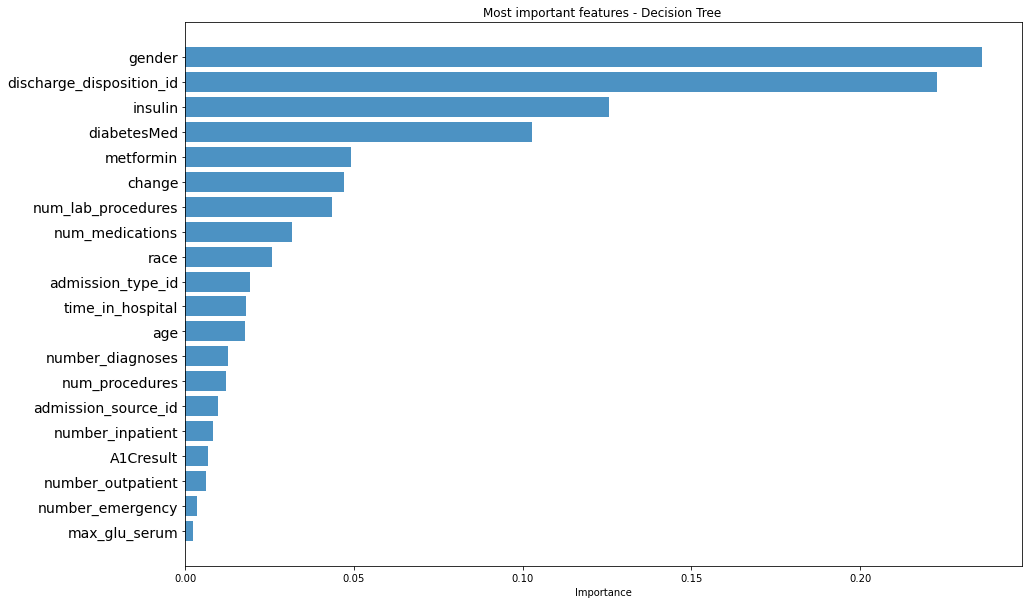

In [47]:
#important features for Decision Tree
feature_names = X_train.columns
feature_imports = dtc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"])
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(15,10))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree ')
plt.show()

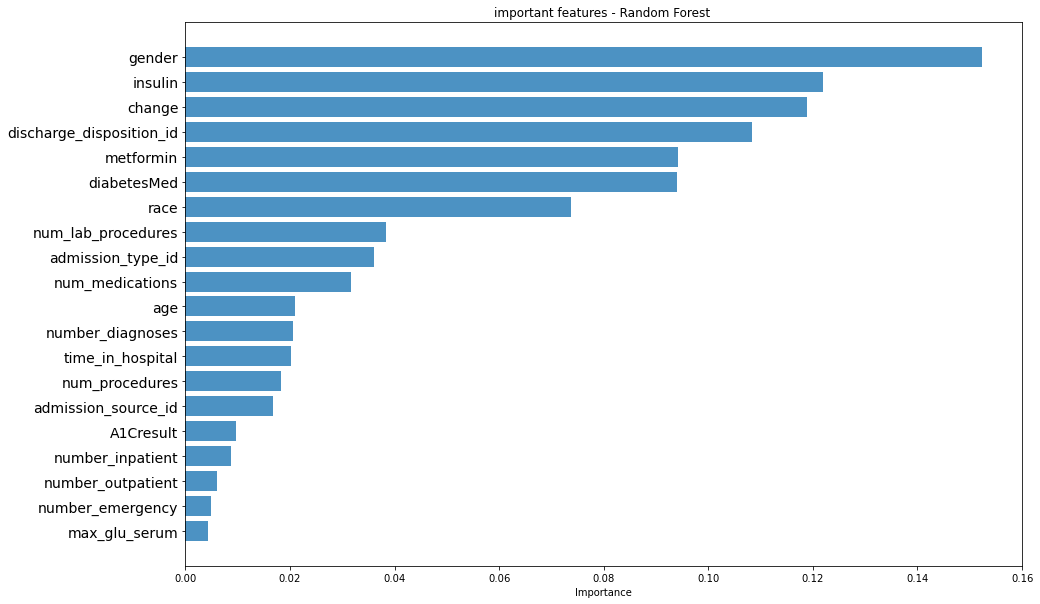

In [48]:
#important features for Random Forest
feature_names = X_train.columns
feature_imports = rfc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"])
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(15,10))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('important features - Random Forest ')
plt.show()

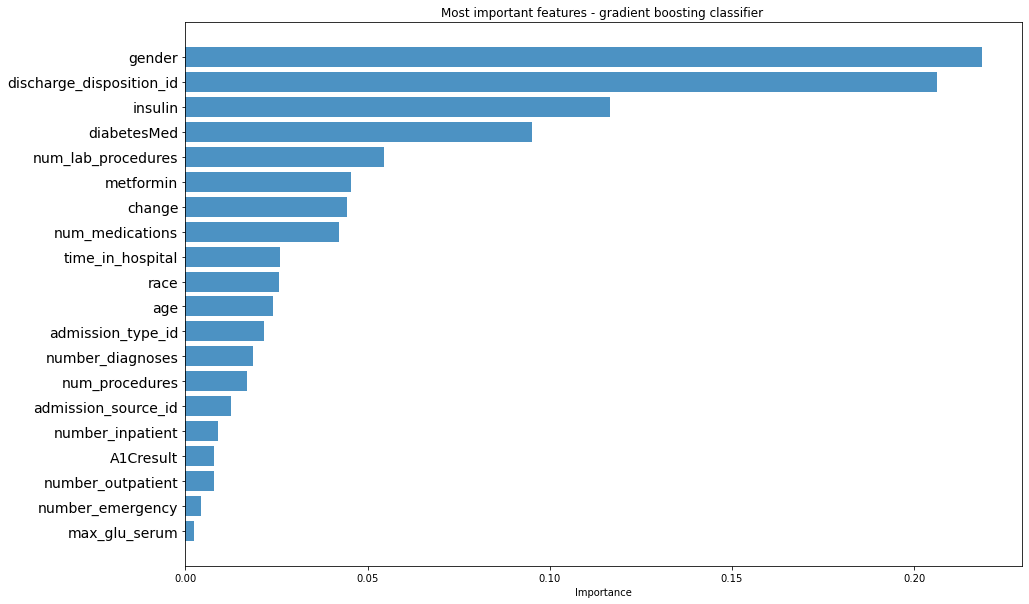

In [49]:
#Feature importance for Gradient Boostng Classifier
feature_names = X_train.columns
feature_imports = gbc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"])
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(15,10))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - gradient boosting classifier ')
plt.show()

FEATURE IMPORTANCE USING SHAP VALUES

In [ ]:
#shap values for randomforest classifier
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features = X_train, feature_names = X_train.columns, plot_type ="bar")

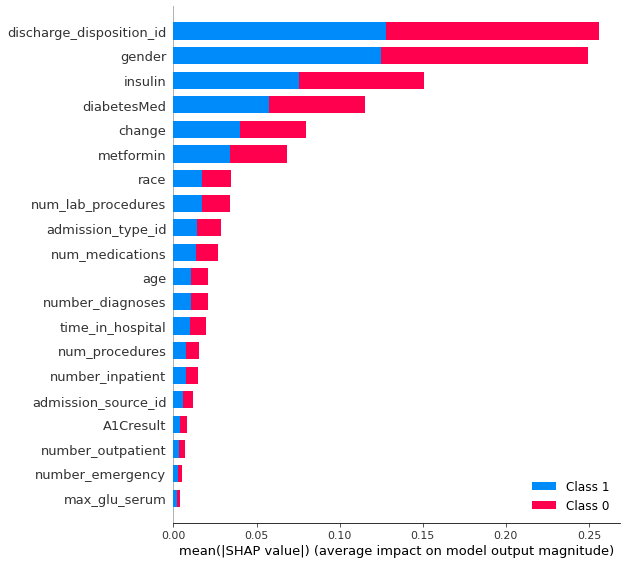

In [51]:
#Decision Tree Classifier
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features = X_train, feature_names = X_train.columns, plot_type ="bar")

In [ ]:
#gradient boosting classifier
explainer = shap.TreeExplainer(gbc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features = X_train, feature_names = X_train.columns, plot_type ="bar")

# Retraining and evaluation with feature importance

decision tree

In [ ]:
## retrain decision tree with top 10 features of decision tree
train_inputDTC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','admission_source_id','number_diagnoses',], axis=1)
print(train_inputDTC.columns)
X_train, X_test, y_train, y_test = train_test_split(train_inputDTC, train_output, test_size=0.20)
dtc = DecisionTreeClassifier(max_depth=28, min_samples_split=10, random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

#evaluate
print("The Accuracy is ", accuracy_score(y_test, dtc_pred))
print("The Classification report on the decision tree model is" , classification_report(y_test, dtc_pred))
cm =confusion_matrix(y_test,dtc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
y_score1 = dtc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for decision tree is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - decision tree(10 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
## retrain decision tree with top 6 features of decision tree
train_inputDTC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','admission_source_id','number_diagnoses','num_medications','admission_type_id','num_lab_procedures','race',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputDTC, train_output, test_size=0.20)
dtc = DecisionTreeClassifier(max_depth=28, min_samples_split=10,random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

#Evaluation for decisionTreeClassifier 
print("The Accuracy is ", accuracy_score(y_test, dtc_pred))
print("The Classification report on the Decision tree model is" , classification_report(y_test, dtc_pred))
cm =confusion_matrix(y_test,dtc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
y_score1 = dtc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for Decision tree is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - Decision Tree(6 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

random forest classifier

In [ ]:
#randomforest classifier
# retrain random forest with top 10 features
#Random forest top 10 features

train_inputRFC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','number_diagnoses','admission_source_id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputRFC, train_output, test_size=0.20)
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=25, min_samples_split=10, random_state = 10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
#evaluate
print("The Accuracy is ", accuracy_score(y_test, rfc_pred))
print("The Classification report on the random forest model is" , classification_report(y_test, rfc_pred))
cm =confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')


y_score1 = rfc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for random forest is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - Random Forest Classifier (10 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
#retrain Random Forest classifier with top 6 features
train_inputRFC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','num_medications','num_lab_procedures','admission_source_id','number_diagnoses', 'admission_type_id','metformin'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputRFC, train_output, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=25, min_samples_split=10, random_state = 10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("The Accuracy is ", accuracy_score(y_test, rfc_pred))
print("The Classification report on the random forest model is" , classification_report(y_test, rfc_pred))
cm =confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

#Evaluate
y_score1 = rfc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for random forestt is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - random forest (6 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()


gradient boosting classifier

In [ ]:
#gradient boosting classifier
#retrain gradient boosting classifier with top 10 features
train_inputGBC= train_input.drop(['age', 'admission_source_id', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult','admission_type_id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputGBC, train_output, test_size=0.20, random_state=0)
#GradientBoostingClassifiers
gbc= GradientBoostingClassifier(n_estimators = 10, max_depth = 25, random_state = 10)
gbc.fit(X_train,y_train)
gbc_prd = gbc.predict(X_test)
#Evaluation for gradientboostingclassifier
print("The Accuracy is ", accuracy_score(y_test, gbc_prd))
print("The Classification report on the gradientboostingclassifier model is" , classification_report(y_test, gbc_prd))
cm =confusion_matrix(y_test,gbc_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

y_score1 = gbc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for gradientboostingclassifiert is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - gradientboosting(10 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()


In [ ]:
#retrain gradient boosting classifier with top 6 features
train_inputGBC= train_input.drop(['age', 'admission_source_id', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult','admission_type_id','race','time_in_hospital','num_medications','change'], axis=1)
train_inputGBC.info()

X_train, X_test, y_train, y_test = train_test_split(train_inputGBC, train_output, test_size=0.20, random_state=0)
gbc= GradientBoostingClassifier(n_estimators = 10, max_depth = 25, random_state = 10)
gbc.fit(X_train,y_train)
gbc_prd = gbc.predict(X_test)
#Evaluation for gradientboostingclassifier
print("The Accuracy is ", accuracy_score(y_test, gbc_prd))
print("The Classification report on the gradientboostingclassifier model is" , classification_report(y_test, gbc_prd))
cm =confusion_matrix(y_test,gbc_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

y_score1 = gbc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for gradientboostingclassifier is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - gradientboosting(6 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

# Retraining and Evaluation with shap values

Decision tree

In [ ]:
## retrain decision tree with top 10 features of decision tree
train_inputDTC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','admission_source_id','number_diagnoses',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputDTC, train_output, test_size=0.20, random_state=0)
dtc = DecisionTreeClassifier(max_depth=28, min_samples_split=10,random_state = 0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

#evaluate
print("The Accuracy is ", accuracy_score(y_test, dtc_pred))
print("The Classification report on the decision tree model is" , classification_report(y_test, dtc_pred))
cm =confusion_matrix(y_test,dtc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
y_score1 = dtc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for decision tree is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - decision tree (6 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
## retrain decision tree with top 6 features of decision tree
train_inputDTC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','admission_source_id','number_diagnoses','num_medications','admission_type_id','num_lab_procedures','race',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputDTC, train_output, test_size=0.20)
dtc = DecisionTreeClassifier(max_depth=28, min_samples_split=10, random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

#Evaluation for decisionTreeClassifier 
print("The Accuracy is ", accuracy_score(y_test, dtc_pred))
print("The Classification report on the decision tree model is" , classification_report(y_test, dtc_pred))
cm =confusion_matrix(y_test,dtc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
y_score1 = dtc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for decision tree is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - decision tree(6 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

Random Forest Classifier

In [ ]:
# retrain random forest with top 10 features
#Random forest top 10 features

train_inputRFC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','num_medications','num_lab_procedures'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputRFC, train_output, test_size=0.20, random_state=0)
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=25, min_samples_split=10, random_state = 10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
#evaluate
print("The Accuracy is ", accuracy_score(y_test, rfc_pred))
print("The Classification report on the random forest model is" , classification_report(y_test, rfc_pred))
cm =confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')


y_score1 = rfc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for random forest is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - Random Forest Classifier (10 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
#retrain Random Forest classifier with top 6 features
train_inputRFC= train_input.drop(['age', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult','num_medications','num_lab_procedures','admission_source_id','number_diagnoses', 'admission_type_id','metformin'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputRFC, train_output, test_size=0.20, random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=25, min_samples_split=10, random_state = 10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("The Accuracy is ", accuracy_score(y_test, rfc_pred))
print("The Classification report on the random forest model is" , classification_report(y_test, rfc_pred))
cm =confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

#Evaluate
y_score1 = rfc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for random forest is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - random forest(5 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()


gradient boosting classifier

In [ ]:
#retrain gradient boosting classifier with top 10 features
train_inputGBC= train_input.drop(['age', 'admission_source_id', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_inputGBC, train_output, test_size=0.20, random_state=0)
#GradientBoostingClassifiers
gbc= GradientBoostingClassifier(n_estimators = 10, max_depth = 25, random_state = 10)
gbc.fit(X_train,y_train)
gbc_prd = gbc.predict(X_test)
#Evaluation for gradientboostingclassifier
print("The Accuracy is ", accuracy_score(y_test, gbc_prd))
print("The Classification report on the gradient boosting classifier model is" , classification_report(y_test, gbc_prd))
cm =confusion_matrix(y_test,gbc_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

y_score1 = gbc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for gradientboosting is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - gradient boosting(10 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()


In [ ]:
#retrain gradient boosting classifier with top 6 features
train_inputGBC= train_input.drop(['age', 'admission_source_id', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult','num_medications','admission_type_id','race','num_lab_procedures'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_inputGBC, train_output, test_size=0.20, random_state=0)
gbc= GradientBoostingClassifier(n_estimators = 10, max_depth = 25, random_state = 10)
gbc.fit(X_train,y_train)
gbc_prd = gbc.predict(X_test)
#Evaluation for gradientboostingclassifier
print("The Accuracy is ", accuracy_score(y_test, gbc_prd))
print("The Classification report on the gradient boosting model is" , classification_report(y_test, gbc_prd))
cm =confusion_matrix(y_test,gbc_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

y_score1 = gbc.predict_proba(X_test)[:,1]
print("The ROC _AUC score for gradient boosting is: ", roc_auc_score(y_test, y_score1))
fpr,tpr, threshold= roc_curve(y_test, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - gradient boosting(6 features)')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

XGB CLASSIFIER

In [ ]:
train_input2 = train_input

In [ ]:
#TRANSFORM FEATURES TO INTEGERS AS REQUIRED BY XGBOOST
lbl = LabelEncoder()
train_input2['gender'] = lbl.fit_transform(train_input2['gender'].astype(int))
train_input2['age'] = lbl.fit_transform(train_input2['age'].astype(str))
train_input2['admission_type_id'] = lbl.fit_transform(train_input2['admission_type_id'].astype(str))
train_input2['discharge_disposition_id'] = lbl.fit_transform(train_input2['discharge_disposition_id'].astype(str))
train_input2['admission_source_id'] = lbl.fit_transform(train_input2['admission_source_id'].astype(str))
train_input2['max_glu_serum'] = lbl.fit_transform(train_input2['max_glu_serum'].astype(str))
train_input2['A1Cresult'] = lbl.fit_transform(train_input2['A1Cresult'].astype(str))
train_input2['metformin'] = lbl.fit_transform(train_input2['metformin'].astype(str))
train_input2['insulin'] = lbl.fit_transform(train_input2['insulin'].astype(str))
train_input2['change'] = lbl.fit_transform(train_input2['change'].astype(str))
train_input2['diabetesMed'] = lbl.fit_transform(train_input2['diabetesMed'].astype(str))
train_input2['race'] = lbl.fit_transform(train_input2['race'].astype(str))

print(train_input2.dtypes)


In [ ]:
#split new dataset 
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_input2, train_output, test_size=0.20, random_state=0)

In [ ]:
xgb= XGBClassifier(n_estimators = 10, max_depth = 25, random_state = 10) 
xgb.fit(X_train2,y_train2) 
xgb_prd = xgb.predict(X_test2) 
print(classification_report(y_test2, xgb_prd))
cm = confusion_matrix(y_test2, xgb_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')

y_score1 = xgb.predict_proba(X_test2)[:,1]
print("The ROC _AUC score for XGBoost is: ", roc_auc_score(y_test2, y_score1))
fpr,tpr, threshold= roc_curve(y_test2, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - XGB')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
#print xgboost shap values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train2)
shap.summary_plot(shap_values, features = X_train2, feature_names = X_train.columns, plot_type ="bar")

In [ ]:
#Feature importance for xgboost using gini importance
feature_names = X_train2.columns
feature_imports = xgb.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"])
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - XGBoost ')
plt.show()

re-evaluation with gini importance

In [ ]:
#retrain with top 10 features
train_input3 = train_input2.drop(['age', 'admission_source_id', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'num_medications','num_lab_procedures'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(train_input3, train_output, test_size=0.20, random_state=0)

xgb= XGBClassifier(n_estimators = 10, max_depth = 25, random_state = 10) 
xgb.fit(X_train2,y_train2) 
xgb_prd = xgb.predict(X_test2)
print(classification_report(y_test2, xgb_prd))
cm = confusion_matrix(y_test2, xgb_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
            
y_score1 = xgb.predict_proba(X_test2)[:,1]
print("The ROC _AUC score for XGBoost is: ", roc_auc_score(y_test2, y_score1))
fpr,tpr, threshold= roc_curve(y_test2, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - XGBoost')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
# retrain with top 6 features
train_input4 = train_input2.drop(['age', 'admission_source_id', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient','num_medications',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult',"gender",'num_lab_procedures', 'admission_type_id'], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_input4, train_output, test_size=0.20, random_state=0)
xgb= XGBClassifier(n_estimators = 10, max_depth = 25, random_state = 10) 
xgb.fit(X_train2,y_train2) 
xgb_prd = xgb.predict(X_test2) 
print(classification_report(y_test2, xgb_prd))
cm = confusion_matrix(y_test2, xgb_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
y_score1 = xgb.predict_proba(X_test2)[:,1]
print("The ROC _AUC score for XGBoost is: ", roc_auc_score(y_test2, y_score1))
fpr,tpr, threshold= roc_curve(y_test2, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - XGBoost')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

re-evaluation with shap values

In [ ]:
#retrain with top 10 features
train_input3 = train_input2.drop(['age', 'admission_source_id', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult'], axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(train_input3, train_output, test_size=0.20, random_state=0)

xgb= XGBClassifier(n_estimators = 10, max_depth = 25, random_state = 10) 
xgb.fit(X_train2,y_train2) 
xgb_prd = xgb.predict(X_test2)
print(classification_report(y_test2, xgb_prd))
cm = confusion_matrix(y_test2, xgb_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
            
y_score1 = xgb.predict_proba(X_test2)[:,1]
print("The ROC _AUC score for XGBoost is: ", roc_auc_score(y_test2, y_score1))
fpr,tpr, threshold= roc_curve(y_test2, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - XGBoost')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

In [ ]:
# retrain with top 6 features
train_input4 = train_input2.drop(['age', 'admission_source_id', 'time_in_hospital', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient','num_medications',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult',"gender",'num_lab_procedures', 'admission_type_id'], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_input4, train_output, test_size=0.20, random_state=0)
xgb= XGBClassifier(n_estimators = 10, max_depth = 25, random_state = 10) 
xgb.fit(X_train2,y_train2) 
xgb_prd = xgb.predict(X_test2) 

print(classification_report(y_test2, xgb_prd))
cm = confusion_matrix(y_test2, xgb_prd)
plt.figure(figsize=(5,3), )
sns.heatmap(cm,annot=True,fmt='g')
y_score1 = xgb.predict_proba(X_test2)[:,1]
print("The ROC _AUC score for XGBoost is: ", roc_auc_score(y_test2, y_score1))
fpr,tpr, threshold= roc_curve(y_test2, y_score1)
plt.subplots(1,figsize=(8,8))
plt.title('ROC - XGBoost')
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"),plt.plot([1,1],c =".7")
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()